# Personalisation and Machine Learning



# Mini Project_Model 6_Embedding_Size_Regularization_Weight

Korina Kyriaki Zaromytidou

This is one of the notebook that show the expirimentation on the model. The data cleaning and processing is the same, which changes noted on the architecture of the model. 
Code snipper  utilised from the weekly notebooks of this and previous terms, and also referred to code from the Coding 3 notebooks. Whenever I utilized code from external sources, I have included this in comments indicating the source.

In [3]:
# Importing relevant libraries 

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

In [4]:
# Importing dataset 

import pandas as pd

data = pd.read_csv('data/Preprocessed_data.csv')
pd.options.display.max_columns = 150


## Understanding the Data

In [5]:
data.shape

(1031175, 19)

In [6]:
data.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.00000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.00000,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.74390,0002005018,5,Clara Callan,Richard Bruce Wright,2001.00000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.00000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.00000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.74390,0002005018,8,Clara Callan,Richard Bruce Wright,2001.00000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.74390,0002005018,0,Clara Callan,Richard Bruce Wright,2001.00000,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


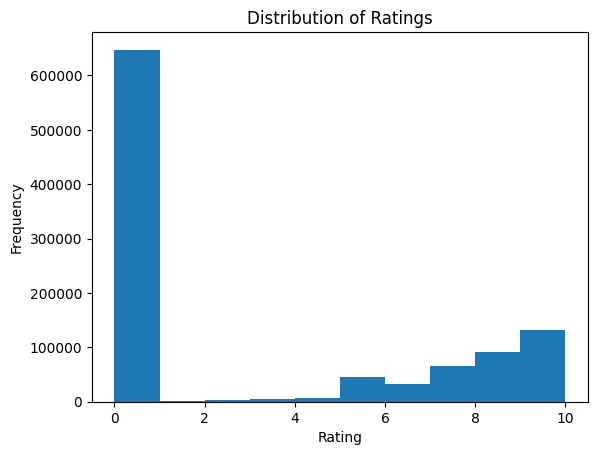

In [7]:
import matplotlib.pyplot as plt

plt.hist(data['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [10]:
# Check the size of the column
column_size = len(data['user_id'])
print("Size of user_id column:", column_size)

# Check the unique values in the column
unique_values = data['user_id'].unique()
print("Unique user IDs:", unique_values)

Size of user_id column: 1031175
Unique user IDs: [     2      8  11400 ... 278713 278714 278729]


## Cleaning the Data

In [11]:
# Check for duplicate ratings by the same user for a book. Code from https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=To%20find%20duplicates%20on%20a,()%20method%20on%20the%20column.&text=The%20result%20is%20a%20boolean,identical%20to%20a%20previous%20one.
duplicate_ratings = data[data.duplicated(subset=['user_id', 'book_title'], keep=False)]

if len(duplicate_ratings) > 0:
    print("Duplicate ratings found by the same user for the following books:")
    print(duplicate_ratings[['user_id', 'book_title']])
else:
    print("No duplicate ratings found.")

Duplicate ratings found by the same user for the following books:
         user_id                                         book_title
31         11676                             The Kitchen God's Wife
33         36836                             The Kitchen God's Wife
36         49635                             The Kitchen God's Wife
39        113519                             The Kitchen God's Wife
112        11676                                      The Testament
...          ...                                                ...
1030416   278418                                         Cinderella
1030447   278418                                              Quest
1030858   278418                                     Selected Poems
1030879   278418  The Legend of Sleepy Hollow (A Troll First-Sta...
1030946   278418                                         Thumbelina

[9330 rows x 2 columns]


In [12]:
# Removing both  lines of the duplicates found 

new_data = data.drop_duplicates(subset=['user_id', 'book_title'], keep=False)

new_data.shape

(1021845, 19)

In [13]:
#new_data.drop(index=new_data.loc[new_data['rating'] == 0].index, inplace=True)
new_data_copy = new_data.copy()
new_data_copy.drop(index=new_data_copy.loc[new_data_copy['rating'] == 0].index, inplace=True)
new_data = new_data_copy

In [14]:
new_data_copy = new_data.copy()
new_data_copy.drop(index=new_data_copy.loc[new_data_copy['rating'] == 0].index, inplace=True)
new_data = new_data_copy

In [15]:
missing_values = new_data['book_title'].isnull().sum()
zeros_count = (new_data['book_title'] == 0).sum()

if missing_values > 0:
    print("There are", missing_values, "missing values in the 'book_title' column.")
else:
    print("There are no missing values in the 'book_title' column.")

if zeros_count > 0:
    print("There are", zeros_count, "zeros in the 'book_title' column.")
else:
    print("There are no zeros in the 'book_title' column.")

There are no missing values in the 'book_title' column.
There are no zeros in the 'book_title' column.


In [16]:
new_data = new_data[new_data['book_title'].apply(lambda x: all(char.isalpha() or char.isspace() for char in x))]
new_data.reset_index(drop=True, inplace=True)

In [17]:
new_data.shape

(168979, 19)

## Understanding the Ratings

In [18]:
# Calculate num_ratings
num_rating = new_data.groupby('book_title')['rating'].count().reset_index()
num_rating.rename(columns={'rating': 'num_ratings'}, inplace=True)
print(num_rating)

# Calculate avg_ratings
avg_rating = new_data.groupby('book_title')['rating'].mean(numeric_only=True).reset_index()
avg_rating.rename(columns={'rating': 'avg_ratings'}, inplace=True)
print(avg_rating)

                           book_title  num_ratings
0                        Dark Justice            1
1                  Weird News Stories            1
2       the Devil Will Drag You Under            1
3                       A B C MURDERS            3
4           A Baby Sister for Frances            1
...                               ...          ...
46619                        stardust           26
46620            the Dark Light Years            2
46621           together by christmas            4
46622                 touch the flame            1
46623                    waking blood            1

[46624 rows x 2 columns]
                           book_title  avg_ratings
0                        Dark Justice     10.00000
1                  Weird News Stories      5.00000
2       the Devil Will Drag You Under      8.00000
3                       A B C MURDERS      8.00000
4           A Baby Sister for Frances      8.00000
...                               ...          ...
46619

In [19]:
avg_num_ratings = num_rating['num_ratings'].mean()
print("Average number of ratings:", avg_num_ratings)

Average number of ratings: 3.6242922100205903


In [20]:
# Sort the average rating dataframe in descending order
sorted_avg_rating = avg_rating.sort_values('avg_ratings', ascending=False)

num_unique_books = new_data['book_title'].nunique()

num_books_with_rating_10 = avg_rating[avg_rating['avg_ratings'] == 10]['book_title'].count()
print("Number of books with an average rating of 10:", num_books_with_rating_10)

Number of books with an average rating of 10: 5479


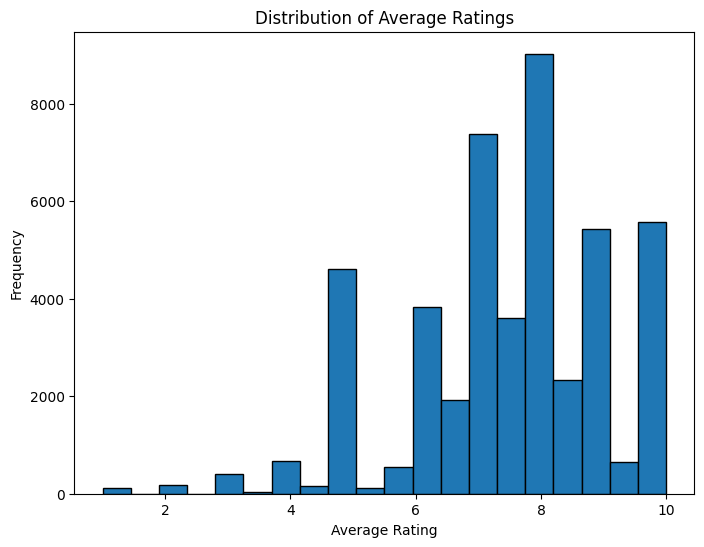

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of average ratings
plt.figure(figsize=(8, 6))
plt.hist(avg_rating['avg_ratings'], bins=20, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

In [22]:
num_books_0_to_1 = len(avg_rating[(avg_rating['avg_ratings'] >= 0) & (avg_rating['avg_ratings'] <= 1)])
print("Number of books with average rating between 0 and 1:", num_books_0_to_1)

Number of books with average rating between 0 and 1: 126


In [23]:
if 0 in new_data['rating'].values:
    zero_ratings_count = new_data['rating'].value_counts()[0]
    print("Number of books with a rating of 0:", zero_ratings_count)
else:
    print("No books with a rating of 0 found.")

No books with a rating of 0 found.


In [24]:
new_data = new_data.copy()
new_data.loc[:, 'book_id'] = pd.factorize(new_data['book_title'])[0]


new_data['user_id'] = pd.factorize(new_data['user_id'])[0]


print("Size of user_id column:", len(new_data['user_id']))
print("Unique user IDs:", new_data['user_id'].unique())

Size of user_id column: 168979
Unique user IDs: [    0     1     2 ... 43130 43131 43132]


In [25]:
new_data.shape
new_data.head

<bound method NDFrame.head of         Unnamed: 0  user_id                      location      age  \
0                1        0      timmins, ontario, canada 34.74390   
1                3        1                 n/a, n/a, n/a 34.74390   
2                5        2      toronto, ontario, canada 30.00000   
3                8        3                     ottawa, , 34.74390   
4                9        4     kingston, ontario, canada 34.74390   
...            ...      ...                           ...      ...   
168974     1031128    43130           wien, wien, austria 37.00000   
168975     1031148    26603        las vegas, nevada, usa 34.74390   
168976     1031149    43131    vancouver, washington, usa 33.00000   
168977     1031150    30625         madrid, madrid, spain 48.00000   
168978     1031151    43132  albuquerque, new mexico, usa 63.00000   

              isbn  rating                          book_title  \
0       0002005018       5                        Clara Callan 

In [26]:
new_data = new_data[new_data['book_id'] != 0]

In [27]:
# Droping the columns not needed
df=new_data.drop(['Unnamed: 0','location','isbn','img_s','img_m','img_l','Summary','city','state'],axis=1)

In [28]:
df.head

<bound method NDFrame.head of         user_id      age  rating                          book_title  \
9             9 71.00000       8                Decision in Normandy   
10           10 40.00000       7                Decision in Normandy   
11            1 34.74390       8                     PLEADING GUILTY   
12           11 34.74390       6         Nights Below Station Street   
13            0 34.74390       5                  The Middle Stories   
...         ...      ...     ...                                 ...   
168974    43130 37.00000      10  The Life and Works of Gustav Klimt   
168975    26603 34.74390       5                The Christmas Spirit   
168976    43131 33.00000      10                     Town Like Alice   
168977    30625 48.00000       5                LA Muerte Del Decano   
168978    43132 63.00000       8                        Orson Welles   

                        book_author  year_of_publication  \
9                      Carlo D'Este          

In [29]:
# Check the size of the column
column_size = len(df['user_id'])
print("Size of user_id column:", column_size)

# Check the unique values in the column
unique_values = df['user_id'].unique()
print("Unique user IDs:", unique_values)

Size of user_id column: 168970
Unique user IDs: [    9    10     1 ... 43130 43131 43132]


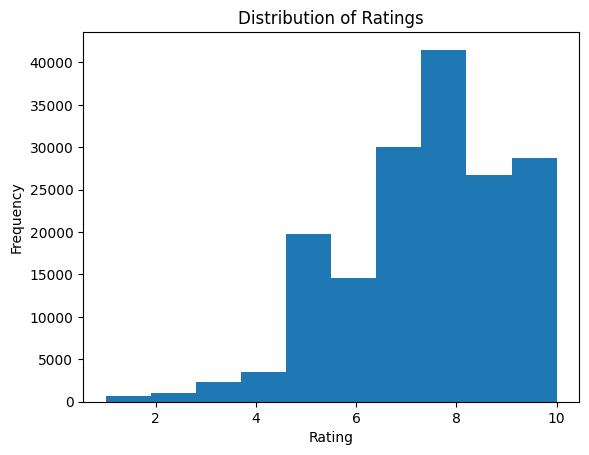

In [30]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

## Preparing for the model

code from https://keras.io/examples/structured_data/collaborative_filtering_movielens/

In [31]:
import pandas as pd
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [33]:
# Creating smaller subset of the bigger one for computation
user_ids_subset = df['user_id'].unique()[:5000]
df_subset = df[df['user_id'].isin(user_ids_subset)]

In [34]:
df_subset.shape

(69772, 11)

In [35]:
df_subset["rating"].describe()

from sklearn.preprocessing import MinMaxScaler

In [36]:
df_subset = df_subset.copy()
df_subset.loc[:, "rating"] = MinMaxScaler().fit_transform(df_subset["rating"].values.reshape(-1, 1))

In [37]:
user_ids = df_subset["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
book_ids = df_subset["book_id"].unique().tolist()
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded2book = {i: x for i, x in enumerate(book_ids)}


df_subset.loc[:, "user"] = df_subset["user_id"].map(user2user_encoded)
df_subset.loc[:, "book"] = df_subset["book_id"].map(book2book_encoded)
df_subset.loc[:, "rating"] = df_subset["rating"].values.astype(np.float32)


num_users = len(user2user_encoded)
num_books = len(book_encoded2book)
df_subset.loc[:, "rating"] = df_subset["rating"].values.astype(np.float32)
#df_subset["rating"] = df_subset["rating"].values.astype(np.float32)
min_rating = min(df_subset["rating"])
max_rating = max(df_subset["rating"])

print(
    "Number of users: {}, Number of books: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_books, min_rating, max_rating
    )
)

Number of users: 5000, Number of books: 24955, Min rating: 0.0, Max rating: 1.0


/var/folders/dc/jjj3rhz5677f3g14zjfccdr80000gn/T/ipykernel_3391/2131395114.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_subset.loc[:, "rating"] = df_subset["rating"].values.astype(np.float32)


In [38]:
# Prepare training and validation data

df_subset = df_subset.sample(frac=1, random_state=42)
x = df_subset[["user", "book"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df_subset["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df_subset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [39]:
# Print the shapes of training data
print("Training data shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Print the shapes of validation data
print("\nValidation data shapes:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

Training data shapes:
x_train shape: (62794, 2)
y_train shape: (62794,)

Validation data shapes:
x_val shape: (6978, 2)
y_val shape: (6978,)


In [40]:
# Main code from  https://keras.io/examples/structured_data/collaborative_filtering_movielens/

from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

EMBEDDING_SIZE = 80

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_books, embedding_size, regularization_weight, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.regularization_weight = regularization_weight
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(self.regularization_weight),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(self.regularization_weight),
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias
        return tf.nn.sigmoid(x)


regularization_weight = 0.1
model = RecommenderNet(num_users, num_books, EMBEDDING_SIZE, regularization_weight)
model.compile(loss=MeanSquaredError(), optimizer=keras.optimizers.Adam(learning_rate=0.001))

Epoch 1/20
982/982 [==============================] - 42s 42ms/step - loss: 0.3563 - val_loss: 0.0714
Epoch 2/20
982/982 [==============================] - 35s 35ms/step - loss: 0.0624 - val_loss: 0.0563
Epoch 3/20
982/982 [==============================] - 33s 34ms/step - loss: 0.0497 - val_loss: 0.0475
Epoch 4/20
982/982 [==============================] - 33s 34ms/step - loss: 0.0419 - val_loss: 0.0421
Epoch 5/20
982/982 [==============================] - 33s 34ms/step - loss: 0.0368 - val_loss: 0.0387
Epoch 6/20
982/982 [==============================] - 33s 34ms/step - loss: 0.0333 - val_loss: 0.0364
Epoch 7/20
982/982 [==============================] - 34s 34ms/step - loss: 0.0308 - val_loss: 0.0349
Epoch 8/20
982/982 [==============================] - 34s 34ms/step - loss: 0.0289 - val_loss: 0.0338
Epoch 9/20
982/982 [==============================] - 34s 34ms/step - loss: 0.0274 - val_loss: 0.0331
Epoch 10/20
982/982 [==============================] - 33s 34ms/step - loss: 0.026

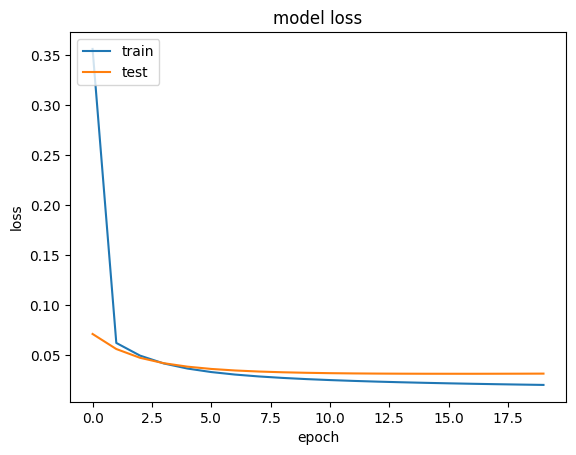

In [41]:
# Train the model based on the data split

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
)


# Plot training and validation loss

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Calculating Score

In [42]:
# Evaluate the model on the test data. Code from https://www.projectpro.io/recipes/make-predictions-keras-model#mcetoc_1g21q2u52e
score = model.evaluate(x=x_val, y=y_val, verbose=0)
print('Test loss:', score)


Test loss: 0.03170778974890709


## Calculating Diversity 

In [43]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Code from Assignment 2 


In [44]:
# Get the embeddings for books
book_embeddings = model.book_embedding.get_weights()[0]

# Calculate the pairwise cosine similarity between book embeddings
book_similarities = cosine_similarity(book_embeddings)

# Calculate diversity for each user
diversities = []
for user_id in user_ids:
    user_books = df_subset[df_subset["user_id"] == user_id]["book"].values
    user_similarities = book_similarities[user_books]
    diversity = np.mean(np.max(user_similarities, axis=1))
    diversities.append(diversity)

# Calculate the average diversity across all users
average_diversity = np.mean(diversities)

# Print the average diversity
print("Average Diversity: {}".format(average_diversity))

Average Diversity: 0.9993705153465271


## Calculating Catalog Coverage

In [45]:
# code from https://grabngoinfo.com/the-ultimate-guide-to-evaluating-your-recommendation-system/

def catalog_coverage(recommended_items, catalog_items):
    unique_recommended_items = set(recommended_items.flatten())
    unique_catalog_items = set(catalog_items.flatten())

    coverage_score = len(unique_recommended_items) / len(unique_catalog_items)
    return coverage_score

# Example usage
recommended_items = model.predict(x_val)  # Recommended item predictions from the model
catalog_items = df_subset["book"].unique()  # All available book IDs in the catalog

coverage_score = catalog_coverage(recommended_items, catalog_items)
print("Catalog Coverage: {:.2%}".format(coverage_score))

219/219 [==============================] - 1s 1ms/step
Catalog Coverage: 27.94%


In [46]:
import numpy as np

def calculate_map(model, x, y, k):
    # Get the predicted ratings for the given inputs
    ratings = model.predict(x)

    # Initialize variables to store average precision and count of relevant items
    avg_precision = 0.0
    num_relevant = 0

    # Iterate over each user's ratings and calculate average precision
    for i in range(len(x)):
        # Sort the predicted ratings in descending order
        predicted_indices = np.argsort(ratings[i])[::-1]
        predicted_indices = predicted_indices[:k]  # Consider only top-k predictions

        # Get the ground truth ratings for the user
        ground_truth_indices = np.where(y[i] > 0)[0]

        # Calculate precision at each position
        precision = 0.0
        num_correct = 0

        for j, pred_index in enumerate(predicted_indices):
            if pred_index in ground_truth_indices:
                num_correct += 1
                precision += num_correct / (j + 1)

        if num_correct > 0:
            precision /= num_correct
            avg_precision += precision
            num_relevant += 1

    if num_relevant > 0:
        avg_precision /= num_relevant

    return avg_precision

k = 10  # Top-k predictions to consider
map_score = calculate_map(model, x_val, y_val, k)
print("Mean Average Precision (MAP) @{}: {:.4f}".format(k, map_score))

219/219 [==============================] - 0s 1ms/step
Mean Average Precision (MAP) @10: 1.0000


In [48]:
# Code theory from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
predicted_ratings = model.predict(x_val)
predicted_ratings = predicted_ratings * (max_rating - min_rating) + min_rating
threshold = 0.5
binary_predictions = (predicted_ratings >= threshold).astype(int)
binary_labels = (y_val >= threshold).astype(int)

true_positives = np.sum(binary_predictions * binary_labels)
false_positives = np.sum(binary_predictions * (1 - binary_labels))
false_negatives = np.sum((1 - binary_predictions) * binary_labels)

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

f1 = 2 * (precision * recall) / (precision + recall)
print("F1-score :", f1)


219/219 [==============================] - 0s 1ms/step
F1-score : 0.8938212093690144
